In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('Data/AAPL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-01,199.130005,201.759995,197.309998,201.500000,198.478760,67935700
1,2018-08-02,200.580002,208.380005,200.350006,207.389999,204.280457,62404000
2,2018-08-03,207.029999,208.740005,205.479996,207.990005,204.871445,33447400
3,2018-08-06,208.000000,209.250000,207.070007,209.070007,205.935257,25425400
4,2018-08-07,209.320007,209.500000,206.759995,207.110001,204.004639,25587400


In [4]:
type(data.Date[1])

str

In [5]:
data['Date'] = pd.to_datetime(data.Date)

In [6]:
data_by_dates = data.set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')

In [7]:
len(data_by_dates)

251

In [8]:
def timeseries_to_supervised(data, lag = 1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis = 1)
    df.fillna(0, inplace = True)
    return df

In [9]:
def difference(dataset, interval = 1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)



In [10]:
def inverse_difference(history, yhat, interval = 1):
    return yhat + history[-interval]

In [11]:
from sklearn.preprocessing import MinMaxScaler
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaler.fit(train)
    
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [12]:
def invert_scale(scale, X, value):
    new_role = [x for x in X] + [value]
    array = np.array(new_role)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0,-1]

In [13]:
series = pd.Series(data_by_dates.Close)

In [14]:
raw_values = series.values
diff_values = difference(raw_values)

In [15]:
diff_values

0      5.889999
1      0.600006
2      1.080002
3     -1.960006
4      0.139999
5      1.630005
6     -1.350006
7      1.339996
8      0.880005
9      0.490005
10     3.080002
11     4.259995
12    -2.119995
13    -0.420014
14     0.010010
15     0.440002
16     0.669999
17     1.779998
18     1.759995
19     3.279999
20     2.050003
21     2.600006
22     0.729996
23    -1.490006
24    -3.769989
25    -1.800003
26    -2.970001
27     5.520004
28    -2.779999
29     5.339997
         ...   
220   -0.580002
221    1.590012
222   -0.680008
223   -0.199997
224   -3.009995
225    4.229996
226   -0.059998
227   -1.820007
228    3.630005
229    1.179993
230    1.680008
231   -0.180008
232   -4.209992
233    1.220001
234    1.989991
235   -1.479996
236    1.550003
237    1.910004
238   -0.710007
239   -1.149994
240    2.309998
241   -3.070008
242    4.630005
243    1.619995
244   -0.169998
245   -1.649994
246    0.720001
247    1.939988
248   -0.899994
249    4.259994
Length: 250, dtype: floa

In [16]:
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

supervised_values

array([[ 0.0000000e+00,  5.8899990e+00],
       [ 5.8899990e+00,  6.0000600e-01],
       [ 6.0000600e-01,  1.0800020e+00],
       [ 1.0800020e+00, -1.9600060e+00],
       [-1.9600060e+00,  1.3999900e-01],
       [ 1.3999900e-01,  1.6300050e+00],
       [ 1.6300050e+00, -1.3500060e+00],
       [-1.3500060e+00,  1.3399960e+00],
       [ 1.3399960e+00,  8.8000500e-01],
       [ 8.8000500e-01,  4.9000500e-01],
       [ 4.9000500e-01,  3.0800020e+00],
       [ 3.0800020e+00,  4.2599950e+00],
       [ 4.2599950e+00, -2.1199950e+00],
       [-2.1199950e+00, -4.2001400e-01],
       [-4.2001400e-01,  1.0010000e-02],
       [ 1.0010000e-02,  4.4000200e-01],
       [ 4.4000200e-01,  6.6999900e-01],
       [ 6.6999900e-01,  1.7799980e+00],
       [ 1.7799980e+00,  1.7599950e+00],
       [ 1.7599950e+00,  3.2799990e+00],
       [ 3.2799990e+00,  2.0500030e+00],
       [ 2.0500030e+00,  2.6000060e+00],
       [ 2.6000060e+00,  7.2999600e-01],
       [ 7.2999600e-01, -1.4900060e+00],
       [-1.49000

In [17]:
train_size = int(len(supervised_values)*0.7)
train, test = supervised_values[0:train_size], supervised_values[train_size:len(supervised_values)]

scaler, train_scaled, test_scaled = scale(train, test)

In [18]:
train, test

(array([[ 0.0000000e+00,  5.8899990e+00],
        [ 5.8899990e+00,  6.0000600e-01],
        [ 6.0000600e-01,  1.0800020e+00],
        [ 1.0800020e+00, -1.9600060e+00],
        [-1.9600060e+00,  1.3999900e-01],
        [ 1.3999900e-01,  1.6300050e+00],
        [ 1.6300050e+00, -1.3500060e+00],
        [-1.3500060e+00,  1.3399960e+00],
        [ 1.3399960e+00,  8.8000500e-01],
        [ 8.8000500e-01,  4.9000500e-01],
        [ 4.9000500e-01,  3.0800020e+00],
        [ 3.0800020e+00,  4.2599950e+00],
        [ 4.2599950e+00, -2.1199950e+00],
        [-2.1199950e+00, -4.2001400e-01],
        [-4.2001400e-01,  1.0010000e-02],
        [ 1.0010000e-02,  4.4000200e-01],
        [ 4.4000200e-01,  6.6999900e-01],
        [ 6.6999900e-01,  1.7799980e+00],
        [ 1.7799980e+00,  1.7599950e+00],
        [ 1.7599950e+00,  3.2799990e+00],
        [ 3.2799990e+00,  2.0500030e+00],
        [ 2.0500030e+00,  2.6000060e+00],
        [ 2.6000060e+00,  7.2999600e-01],
        [ 7.2999600e-01, -1.490006

In [19]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

def fit_lstm (train, batch_size, nb_epoch, neuron):
    X,y = train[:, 0:-1], train[:, -1]
    X=X.reshape(X.shape[0], 1, X.shape[1])
    
    model = Sequential()
    model.add(LSTM(neuron, batch_input_shape = (batch_size, X.shape[1], X.shape[2]), 
                  stateful = True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',
                 optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X,y, epochs=1,
                 batch_size=batch_size, 
                 verbose=0,
                 shuffle=False)
        model.reset_states()
        return model

Using TensorFlow backend.


In [20]:
def forecast_lstm(model, batch_size, X):
    X=X.reshape(1,1,len(X))
    yhat = model.predict(X, batch_size = batch_size,
                        verbose = 0)
    return yhat[0,0]

In [21]:
from keras.losses import mean_absolute_error
from math import sqrt

repeat =30
error_scores = list()
for i in range(repeat):
    lstm_model = fit_lstm(train_scaled, 1, 30,neuron= 4)
    predictions = []
    
    for i in range(len(test_scaled)):
        X,y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        
        yhat = invert_scale(scaler, X, yhat)
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        
        predictions.append(yhat)
        
#     rmse = sqrt(mean_absolute_error(raw_values[train_size:len(supervised_values)],
#                                    predictions))
    
#     print('%d) Test RMSE: %3f'%(r+1, rmse))
#     error_scores.append(rmse)

W0805 20:50:18.647766 4484660544 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 20:50:18.679064 4484660544 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 20:50:18.683431 4484660544 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 20:50:18.988348 4484660544 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.t

In [22]:
import matplotlib.pyplot as plt


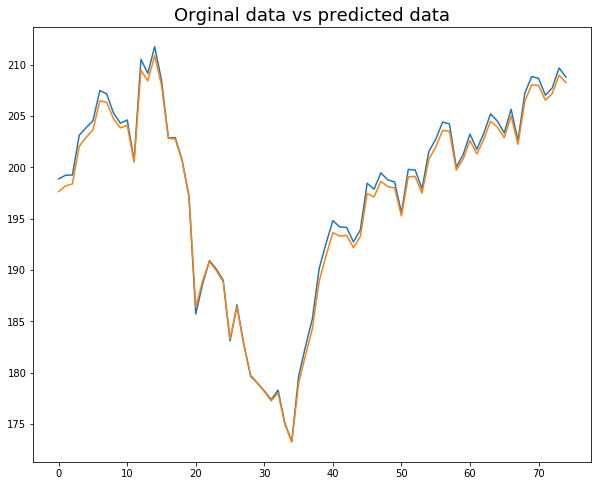

In [23]:
plt.figure(figsize=(10,8))
plt.plot(raw_values[train_size:len(supervised_values)])
plt.plot(predictions)
plt.title('Orginal data vs predicted data', fontsize =18)
plt.show()

In [52]:
f = np.array(213.039993)
scaler = MinMaxScaler(feature_range=(-1,1))

scaler = scaler.fit(f.reshape(-1,1))

train = f.reshape(1,1)
train_scaled = scaler.transform(train)
train_scaled

array([[-1.]])

In [25]:
initial = train_scaled

predictions = []

for i in range(40):
    yhat = forecast_lstm(lstm_model, 1, initial)
    
    yhat_inverse = scaler.inverse_transform(yhat.reshape(-1,1))
    
    predictions.append(yhat_inverse)
    
    initial = np.array([yhat])

In [28]:
date_range = pd.date_range('2019-07-31 00:00:00', periods=40, freq='M')
date_range = pd.DataFrame(date_range)

predictions = pd.merge(date_range, pd.Series(predictions, name='Prediction'), left_index=True, right_index=True, 
                     how='outer')
predictions.columns = ['Date', 'Close']

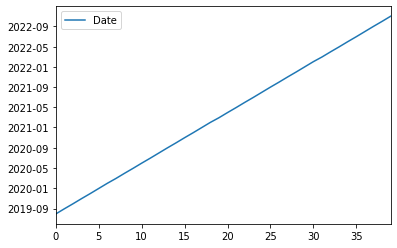

In [30]:
predictions.plot()

In [50]:
pd.Series(predictions.Close).values

array([array([[213.65681]], dtype=float32),
       array([[213.65271]], dtype=float32),
       array([[213.64264]], dtype=float32),
       array([[213.63602]], dtype=float32),
       array([[213.63179]], dtype=float32),
       array([[213.62906]], dtype=float32),
       array([[213.62729]], dtype=float32),
       array([[213.62613]], dtype=float32),
       array([[213.62538]], dtype=float32),
       array([[213.62488]], dtype=float32),
       array([[213.62454]], dtype=float32),
       array([[213.62431]], dtype=float32),
       array([[213.62416]], dtype=float32),
       array([[213.62407]], dtype=float32),
       array([[213.624]], dtype=float32),
       array([[213.62395]], dtype=float32),
       array([[213.62392]], dtype=float32),
       array([[213.6239]], dtype=float32),
       array([[213.62389]], dtype=float32),
       array([[213.62389]], dtype=float32),
       array([[213.62387]], dtype=float32),
       array([[213.62387]], dtype=float32),
       array([[213.62387]], dtype=f